# 1.Chuẩn bị các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

# 2.Quan sát dữ liệu

In [2]:
data = pd.read_csv('../Data/Loan_default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# 3.Xử lí dữ liệu

### 3.1.Xử lí dữ liệu trùng lặp và dữ liệu thiếu

In [4]:
data = data.drop('LoanID', axis=1)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### 3.2.Xử lí dữ liệu object

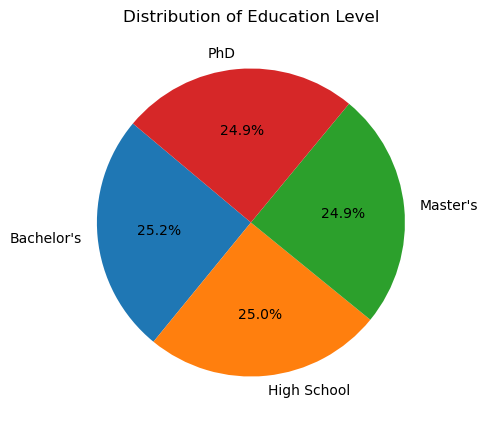

In [7]:
education_count = data['Education'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Level')
plt.show()

In [8]:
education_map = {'PhD': 0, "Master's": 1, "Bachelor's": 2, 'High School': 3}
data['Education'] = data['Education'].map(education_map)

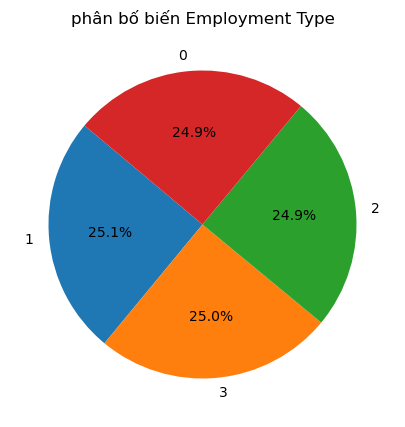

In [37]:
employees = data['EmploymentType'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(employees, labels=employees.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Employment Type')
plt.show()

In [10]:
data['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [11]:
employees_map = {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3}
data['EmploymentType'] = data['EmploymentType'].map(employees_map)

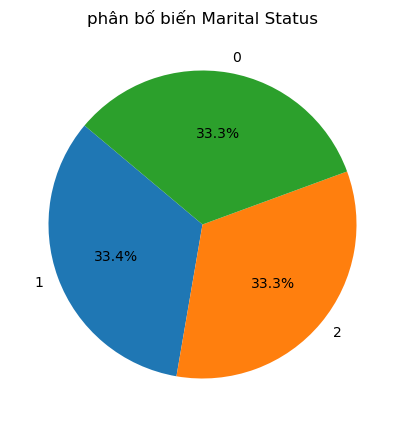

In [38]:
martial_status = data['MaritalStatus'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(martial_status, labels=martial_status.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Marital Status')
plt.show()

In [13]:
MaritalStatus_map = {'Single': 0, 'Married': 1, 'Divorced': 2}
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_map)

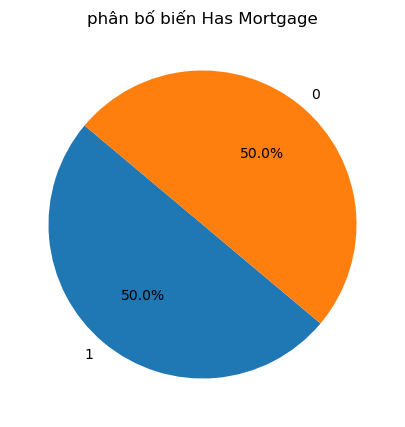

In [39]:
hasmoregage = data['HasMortgage'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(hasmoregage, labels=hasmoregage.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Has Mortgage')
plt.show()

In [15]:
HasMortgage_map = {'No': 0, 'Yes': 1}
data['HasMortgage'] = data['HasMortgage'].map(HasMortgage_map)

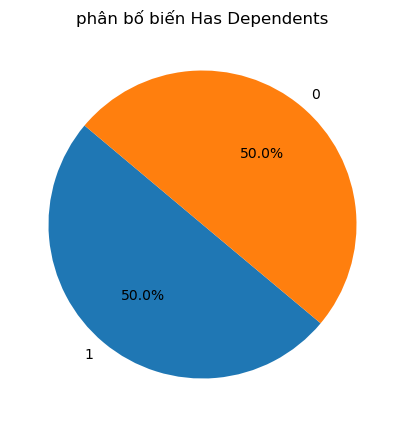

In [40]:
hasdependent_count = data['HasDependents'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(hasdependent_count, labels=hasdependent_count.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Has Dependents')
plt.show()


In [17]:
hasdependent_map = {'No': 0, 'Yes': 1}
data['HasDependents'] = data['HasDependents'].map(hasdependent_map)

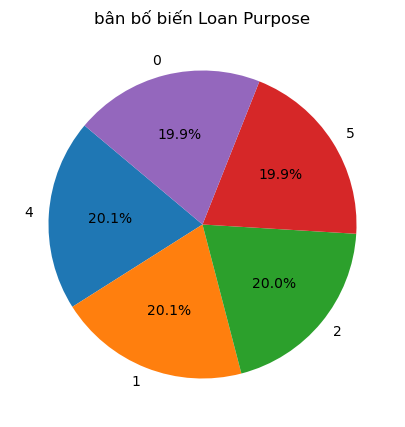

In [41]:
loanpurpose = data['LoanPurpose'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(loanpurpose, labels=loanpurpose.index, autopct='%1.1f%%', startangle=140)
plt.title('bân bố biến Loan Purpose')
plt.show()

In [19]:
loanpurpose_map = {'Auto':0, 'Home':1, 'Education':2, 'Personal':3,'Business':4,'Other':5}
data['LoanPurpose'] = data['LoanPurpose'].map(loanpurpose_map)

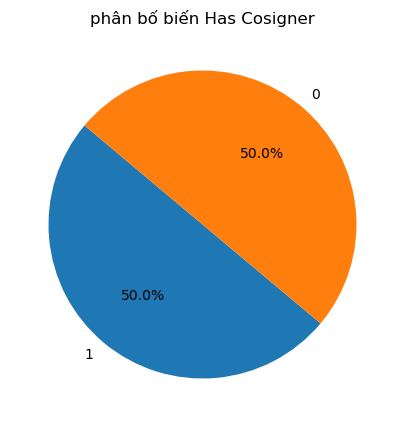

In [42]:
hascosigner_count = data['HasCoSigner'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(hascosigner_count, labels=hascosigner_count.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Has Cosigner')
plt.show()

In [21]:
hascosigner_map = {'No': 0, 'Yes': 1}
data['HasCoSigner'] = data['HasCoSigner'].map(hascosigner_map)

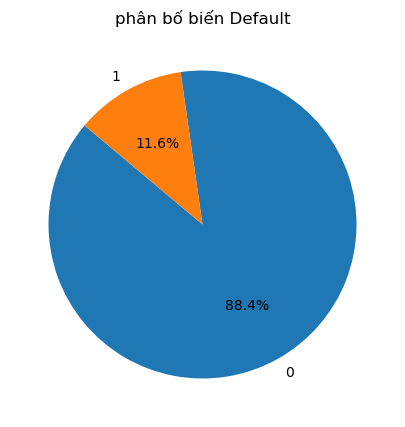

In [43]:
default_count= data['Default'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(default_count, labels=default_count.index, autopct='%1.1f%%', startangle=140)
plt.title('phân bố biến Default')
plt.show()

# 4.Xây dựng mô hình dự đoán

In [23]:
# Tách dữ liệu vào X (features) và y (target)
X = data.drop('Default', axis=1)
y = data['Default']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Cân bằng lại tập huấn luyện với SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f'phân phối biến sau SMOTE: {Counter(y_res)}')

phân phối biến sau SMOTE: Counter({0: 180524, 1: 180524})


In [29]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_res, y_res)

c:\Users\huuna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

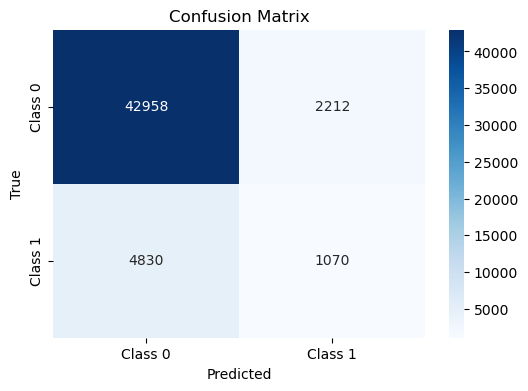

In [33]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Tính các chỉ số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In các chỉ số đánh giá
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8621
Precision: 0.3260
Recall: 0.1814
F1-Score: 0.2331


In [36]:
# Đánh giá mô hình trên dữ liệu huấn luyện
train_score = model.score(X_train, y_train)
print(f'Train accuracy: {train_score}')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_score = model.score(X_test, y_test)
print(f'Test accuracy: {test_score}')

Train accuracy: 0.8734708263779084
Test accuracy: 0.8621108282749168


# 5.Lưu mô hình 


In [45]:
import joblib
joblib.dump(model, '../Data/xgboost_model.pkl')

['../Data/xgboost_model.pkl']